In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from scipy.stats import pearsonr, spearmanr, stats
from explore import get_auto_mpg, train_val_test
import wrangle

In [2]:
df = get_auto_mpg()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   displ       392 non-null    float64
 3   horsepower  392 non-null    float64
 4   weight      392 non-null    float64
 5   acc         392 non-null    float64
 6   model_year  392 non-null    int64  
 7   origin      392 non-null    int64  
 8   name        392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


# Univariate distributions
### Continuous variable distributions
* plt.hist
* sns.displot
* sns.boxplot

In [4]:
cont_var = ['mpg', 'displ', 'horsepower', 'weight', 'acc']

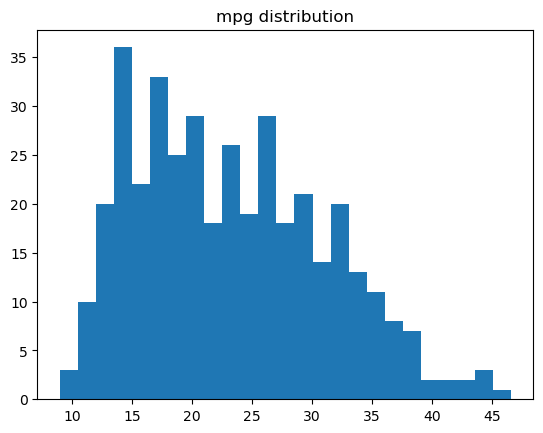

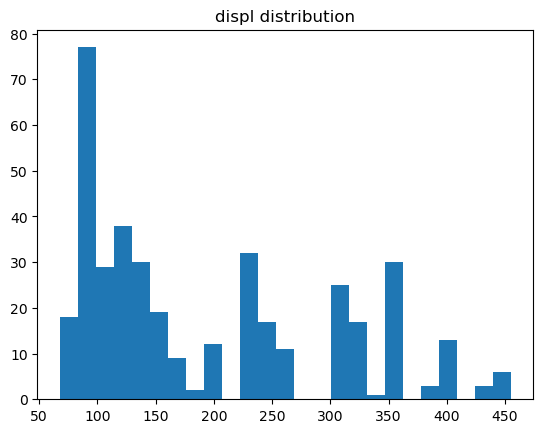

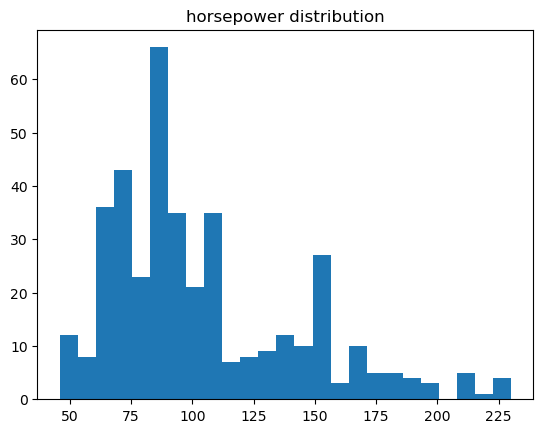

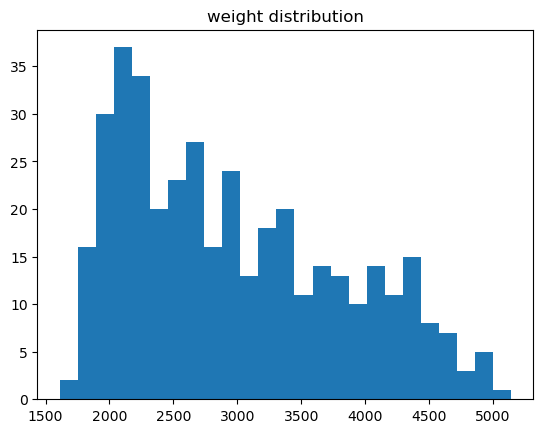

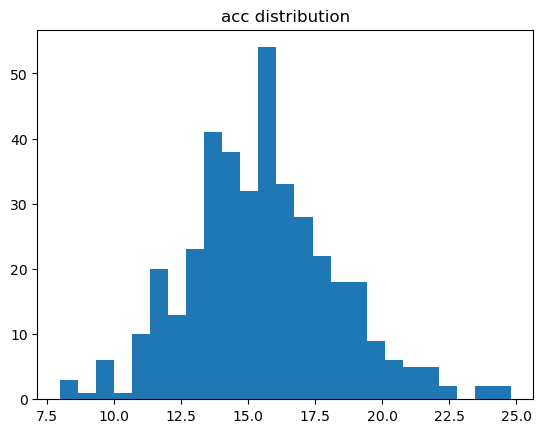

In [5]:
for col in cont_var:
    plt.hist(df[col], bins=25)
    plt.title(f'{col} distribution')
    plt.show()

* acceleration and mpg are normally distributed.
* Displacement, horsepower, and weight are NOT normally distributed

In [6]:
df['name'].nunique()

301

In [7]:
df['model_year'].nunique(), df['origin'].nunique()

(13, 3)

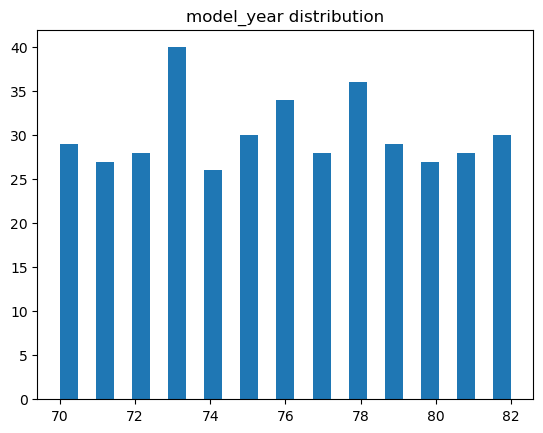

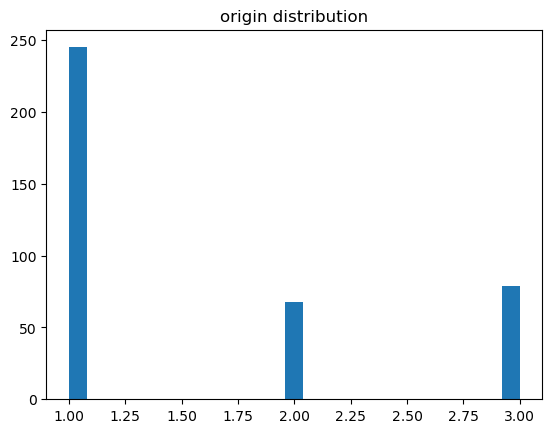

In [8]:
for col in ['model_year', 'origin']:
    plt.hist(df[col], bins = 25)
    plt.title(f'{col} distribution')
    plt.show()

Model year is a uniform distribution from years 1970 - 1982<br>
The origin distribution is skewed, with many cars coming from origin 1.

In [9]:
train, val, test = train_val_test(df)

In [10]:
train_corr = train[cont_var].corr(method='spearman')

<AxesSubplot:>

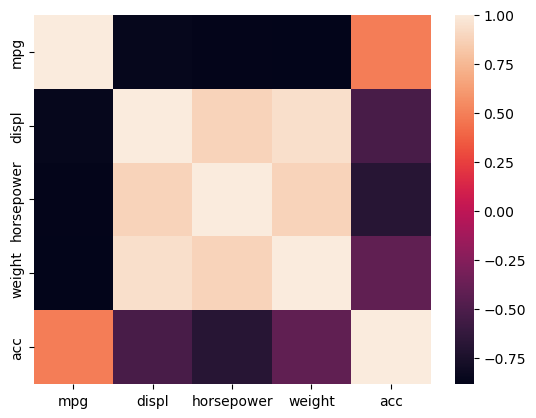

In [11]:
sns.heatmap(train_corr)

Displacement, horesepower, and weight all show a strong negative correlation with mpg.

Acceleration and mpg have a moderate positive correlation.

There is a strong positive correlation between displacement, horsepower, and weight.

There is a moderate negative correlation between acceleration and (displacement, horsepower, and weight).

It would be important to compare the spearmanr results beteen displacement, horsepower, and weight

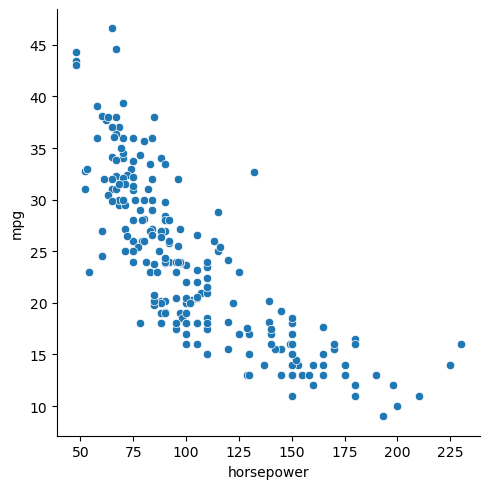

In [12]:
sns.relplot(x='horsepower', y= 'mpg', data = train )

There is a strong negative correlation between horsepower andmpg, but it is clearly no linear!

Discret with continuous
* sns.swarmplot
* sns.stipplot
* sns.boxplot
* sns.violinplot
* sns.barplot

<AxesSubplot:xlabel='origin', ylabel='mpg'>

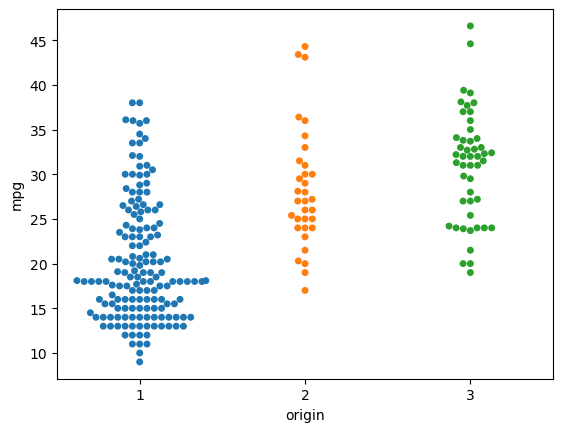

In [13]:
sns.swarmplot(x = 'origin', y= 'mpg', data = train)

Origin 1 appears to make cars with lower mpg. I would use a one-sample t-test to compare the mpg of origin 1 cars to the overall mean in the train dataset

Null hypothesis: The mpg for origin 1 cars is greater than or equal to the overall average mpg.

Alternative hypothesis: The mpg for origin 1 cars is less than the overall average

In [14]:
t, p = stats.ttest_1samp(train[train['origin'] == 1]['mpg'], train['mpg'].mean())

In [15]:
alpha = 0.05
if t < 0 and p / 2 < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject null hypothesis


The test rejected the null hypothesis, origin 1 cars have significantly less mpg than th eoverall average.

#### Discrete with discrete

* pd.crosstab, passed into sns.heatmap

# Exercises

In [16]:
df = wrangle.get_zillow_data() #using function made to wrangle data

In [17]:
train, val, test = wrangle.wrangle_zillow() #splitting data

In [18]:
train.info() #taking a look at the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192919 entries, 553191 to 1333156
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1192919 non-null  float64
 1   bathrooms   1192919 non-null  float64
 2   area        1192919 non-null  float64
 3   tax_value   1192919 non-null  float64
 4   year_built  1192919 non-null  float64
 5   taxamount   1192919 non-null  float64
 6   fips        1192919 non-null  float64
dtypes: float64(7)
memory usage: 72.8 MB


In [19]:
cont_var = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount', 'fips']
# creating a variable to 

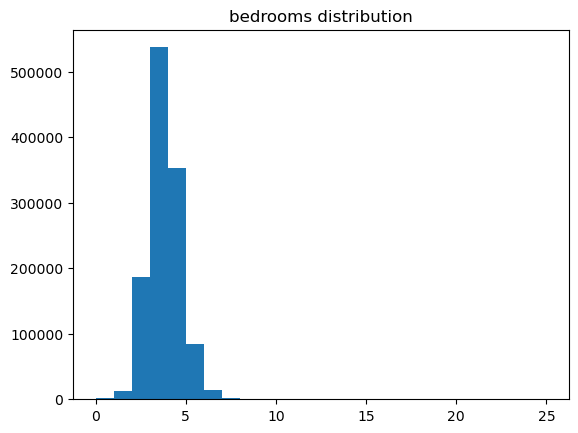

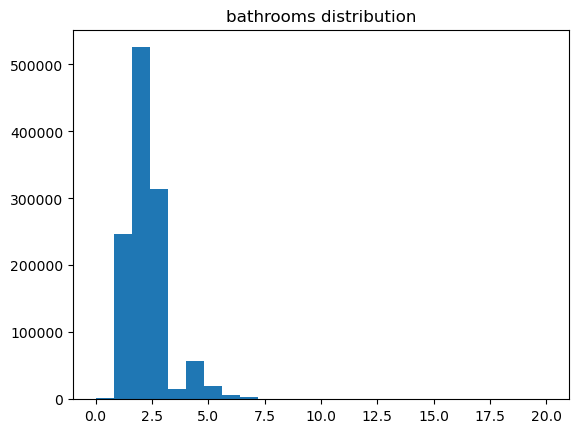

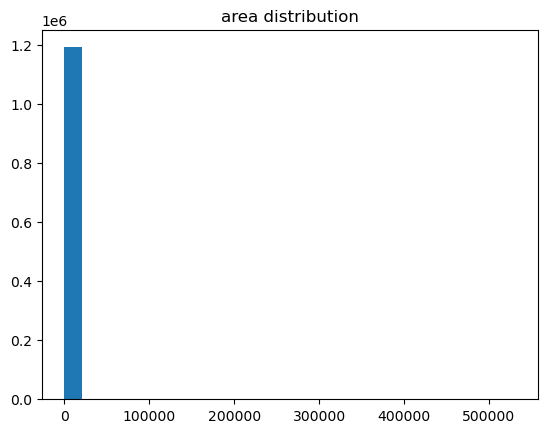

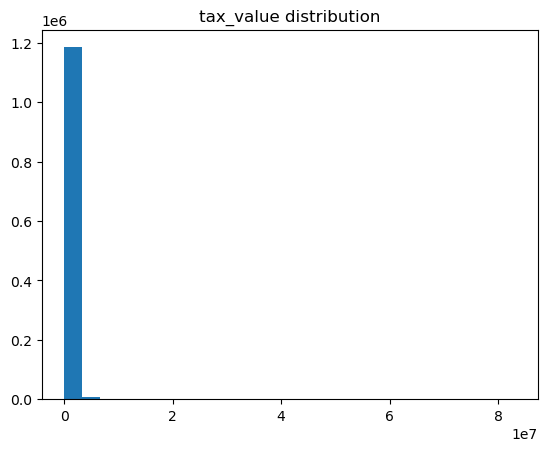

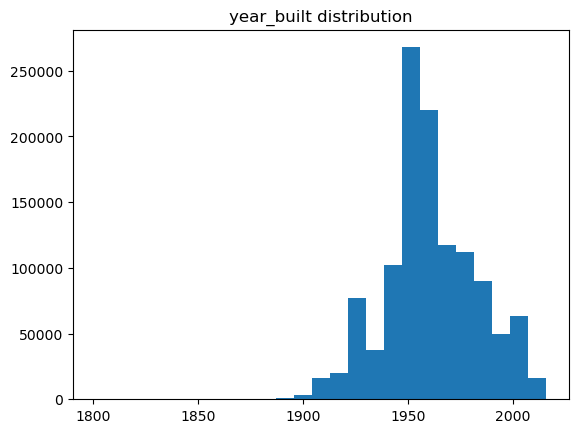

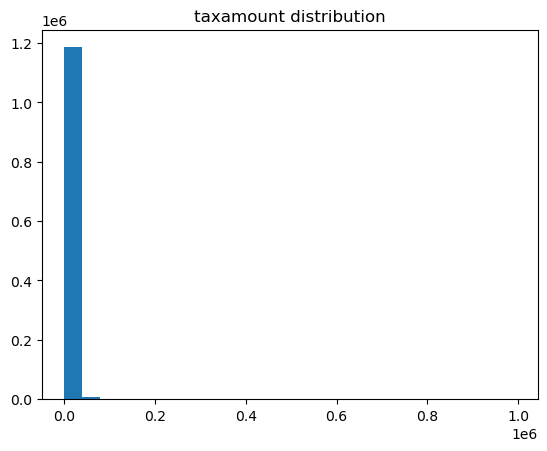

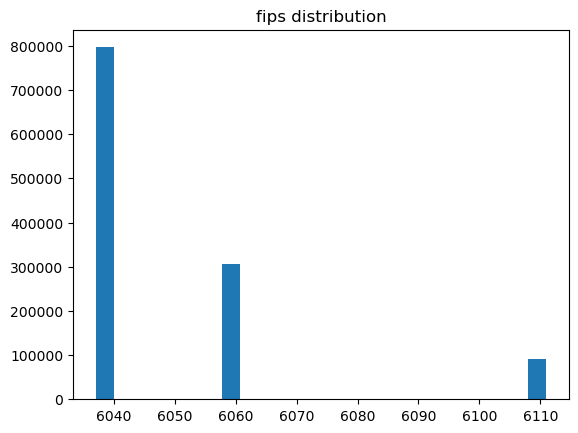

In [20]:
for col in cont_var:
    plt.hist(train[col], bins=25)
    plt.title(f'{col} distribution')
    plt.show()

In [21]:
zillow_corr = train.corr()    

In [22]:
zillow_corr

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
bedrooms,1.000000,0.641983,0.539584,0.259286,0.377385,0.260512,0.136412
bathrooms,0.641983,1.000000,0.744199,0.507247,0.509533,0.507785,0.097763
area,0.539584,0.744199,1.000000,0.548269,0.392739,0.546605,0.086191
tax_value,0.259286,0.507247,0.548269,1.000000,0.193014,0.990425,0.018351
year_built,0.377385,0.509533,0.392739,0.193014,1.000000,0.194676,0.300607
taxamount,0.260512,0.507785,0.546605,0.990425,0.194676,1.000000,-0.005263
fips,0.136412,0.097763,0.086191,0.018351,0.300607,-0.005263,1.000000


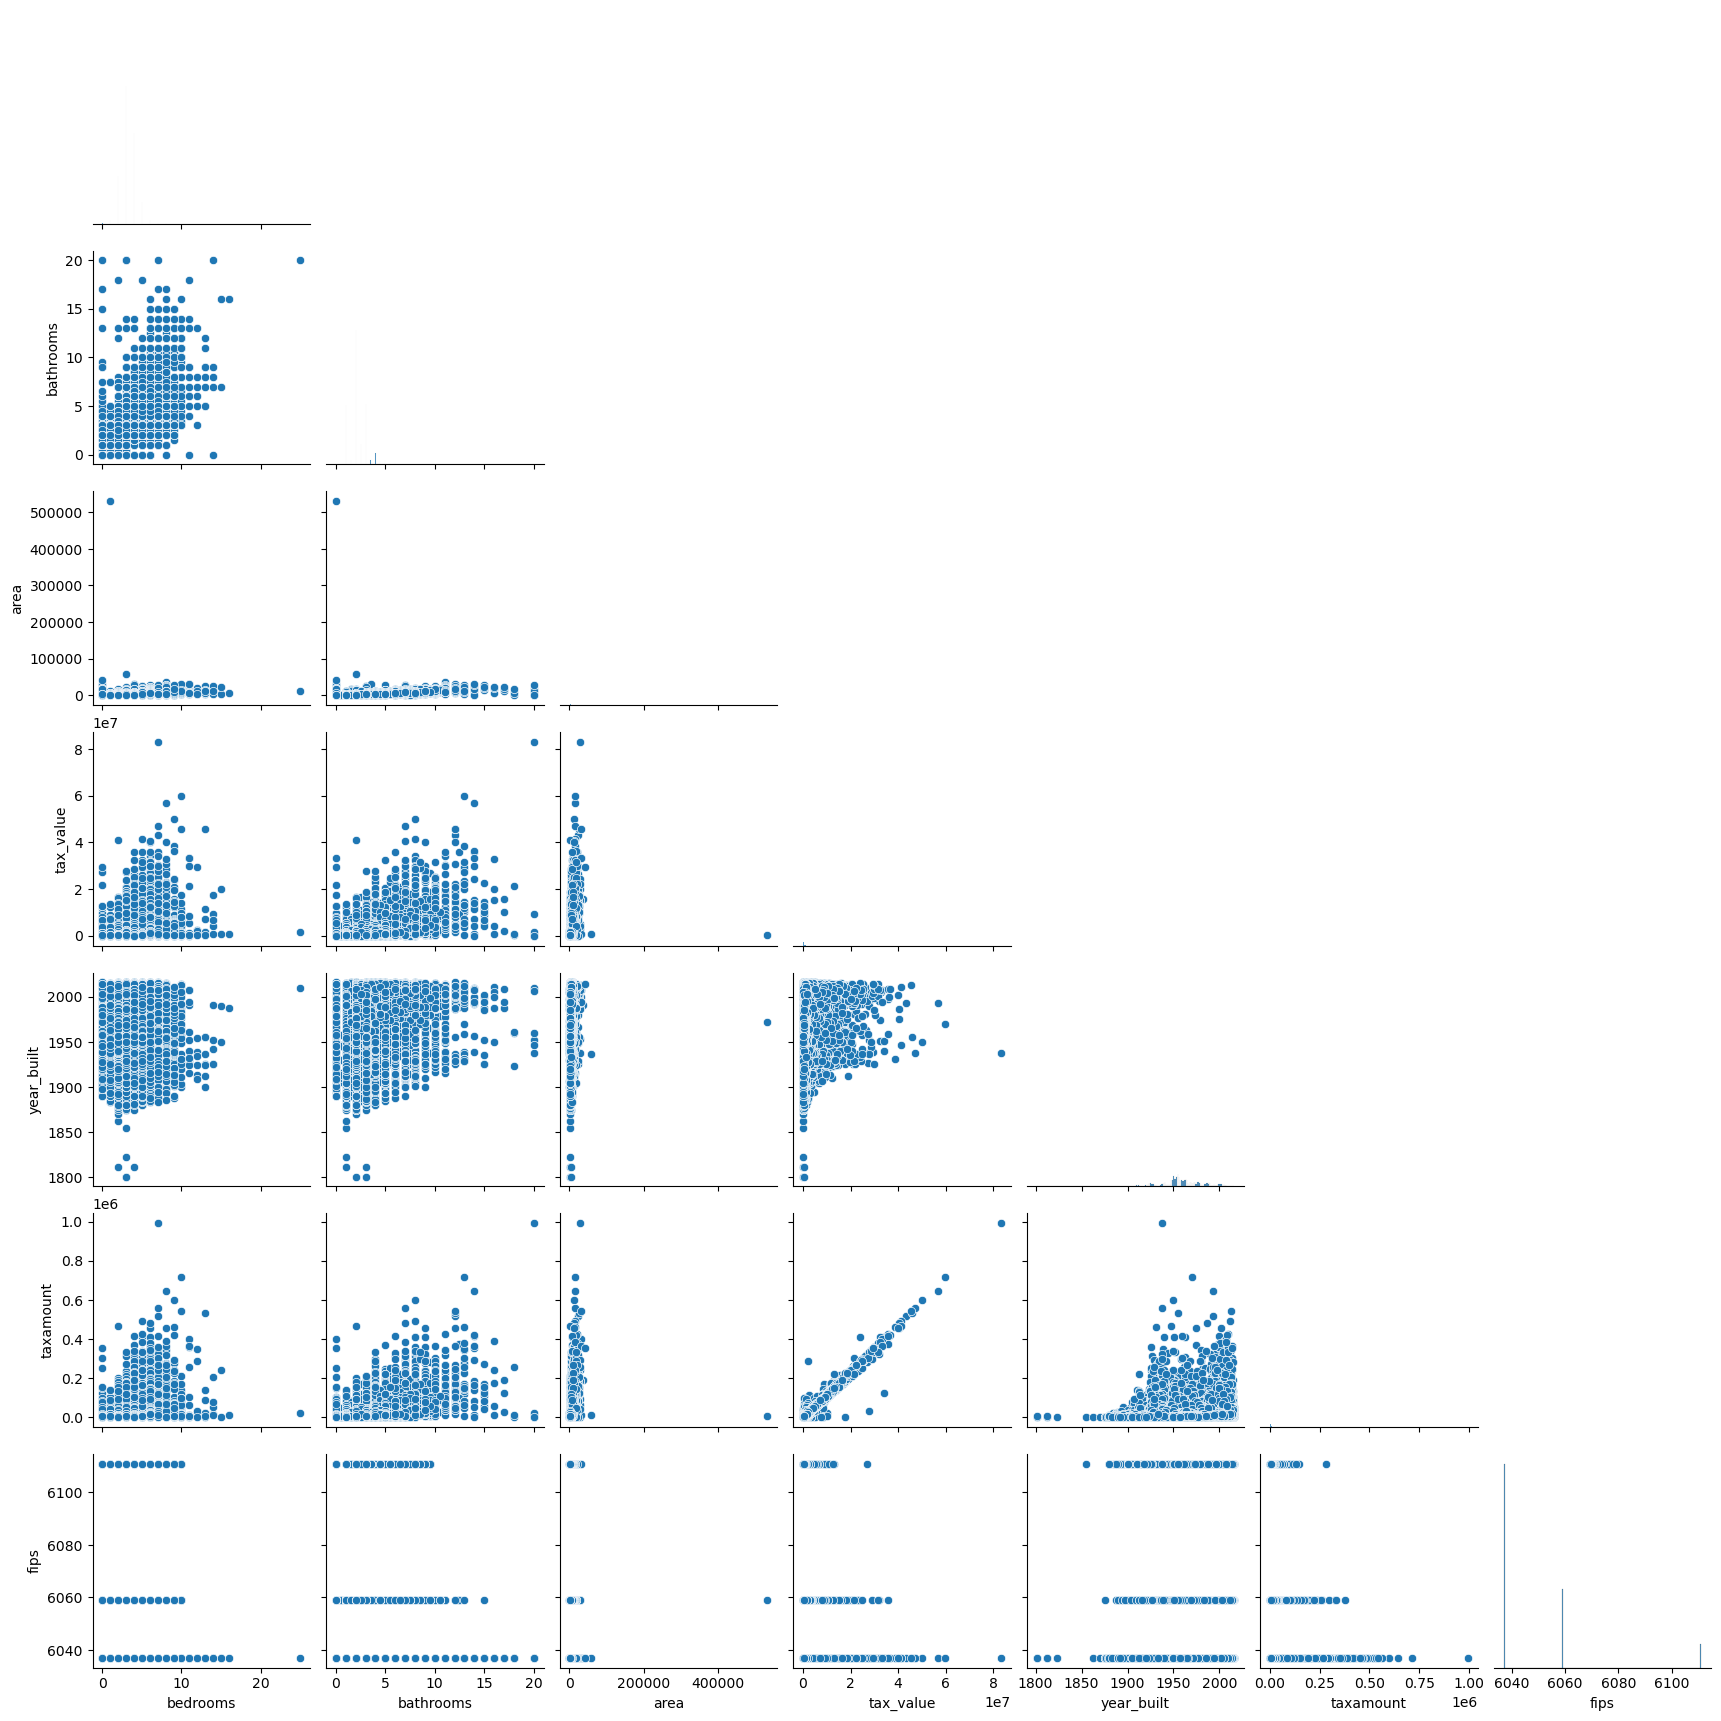

In [23]:
sns.pairplot(train[['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount', 'fips']], corner=True)
plt.show()

In [24]:
def plot_variable_pairs(df):
    return sns.pairplot(df[['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount', 'fips']], corner=True)
plt.show()

In [25]:
train

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
553191,4.0,2.0,1556.0,373090.0,1923.0,4579.25,6037.0
1209132,3.0,2.0,1513.0,74070.0,1937.0,986.55,6037.0
174634,4.0,2.0,2040.0,138000.0,1954.0,2553.05,6037.0
170584,3.0,2.0,1834.0,263870.0,1959.0,3139.76,6059.0
2001226,2.0,2.0,1225.0,335603.0,1975.0,3461.38,6059.0
...,...,...,...,...,...,...,...
562147,3.0,2.0,1161.0,65135.0,1956.0,1648.42,6037.0
1530656,3.0,2.0,2042.0,130866.0,1950.0,1531.56,6037.0
745152,4.0,2.0,1280.0,92456.0,1957.0,1904.80,6037.0
249374,2.0,1.0,748.0,226667.0,1920.0,3223.60,6037.0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192919 entries, 553191 to 1333156
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1192919 non-null  float64
 1   bathrooms   1192919 non-null  float64
 2   area        1192919 non-null  float64
 3   tax_value   1192919 non-null  float64
 4   year_built  1192919 non-null  float64
 5   taxamount   1192919 non-null  float64
 6   fips        1192919 non-null  float64
dtypes: float64(7)
memory usage: 72.8 MB


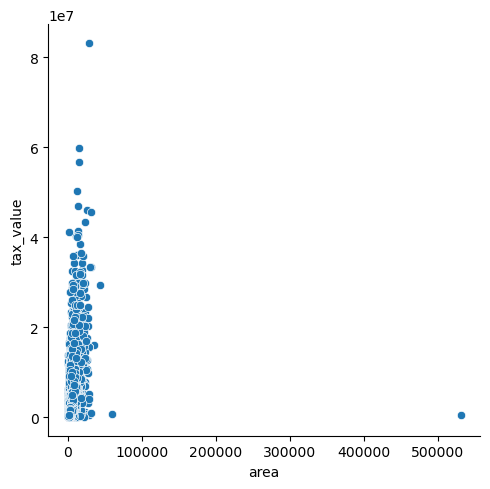

In [27]:
sns.relplot(data = train, x = 'area', y = 'tax_value')

In [28]:
Q1 = np.percentile(train['tax_value'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(train['tax_value'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
  
print(IQR)

345362.0


In [29]:
def drop_outliers(train):
    Q1 = np.percentile(train['tax_value'], 25, interpolation = 'midpoint')
    Q3 = np.percentile(train['tax_value'], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    train = train[train['tax_value'] <= Q3 + (1.5 * IQR)]
    train = train[train['tax_value'] >= Q1 + (1.5 * IQR)]
    
    Q1 = np.percentile(train['taxamount'], 25, interpolation = 'midpoint')
    Q3 = np.percentile(train['taxamount'], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    train = train[train['taxamount'] <= Q3 + (1.5 * IQR)]
    train = train[train['taxamount'] >= Q1 + (1.5 * IQR)]

    return train

In [30]:
train = drop_outliers(train)

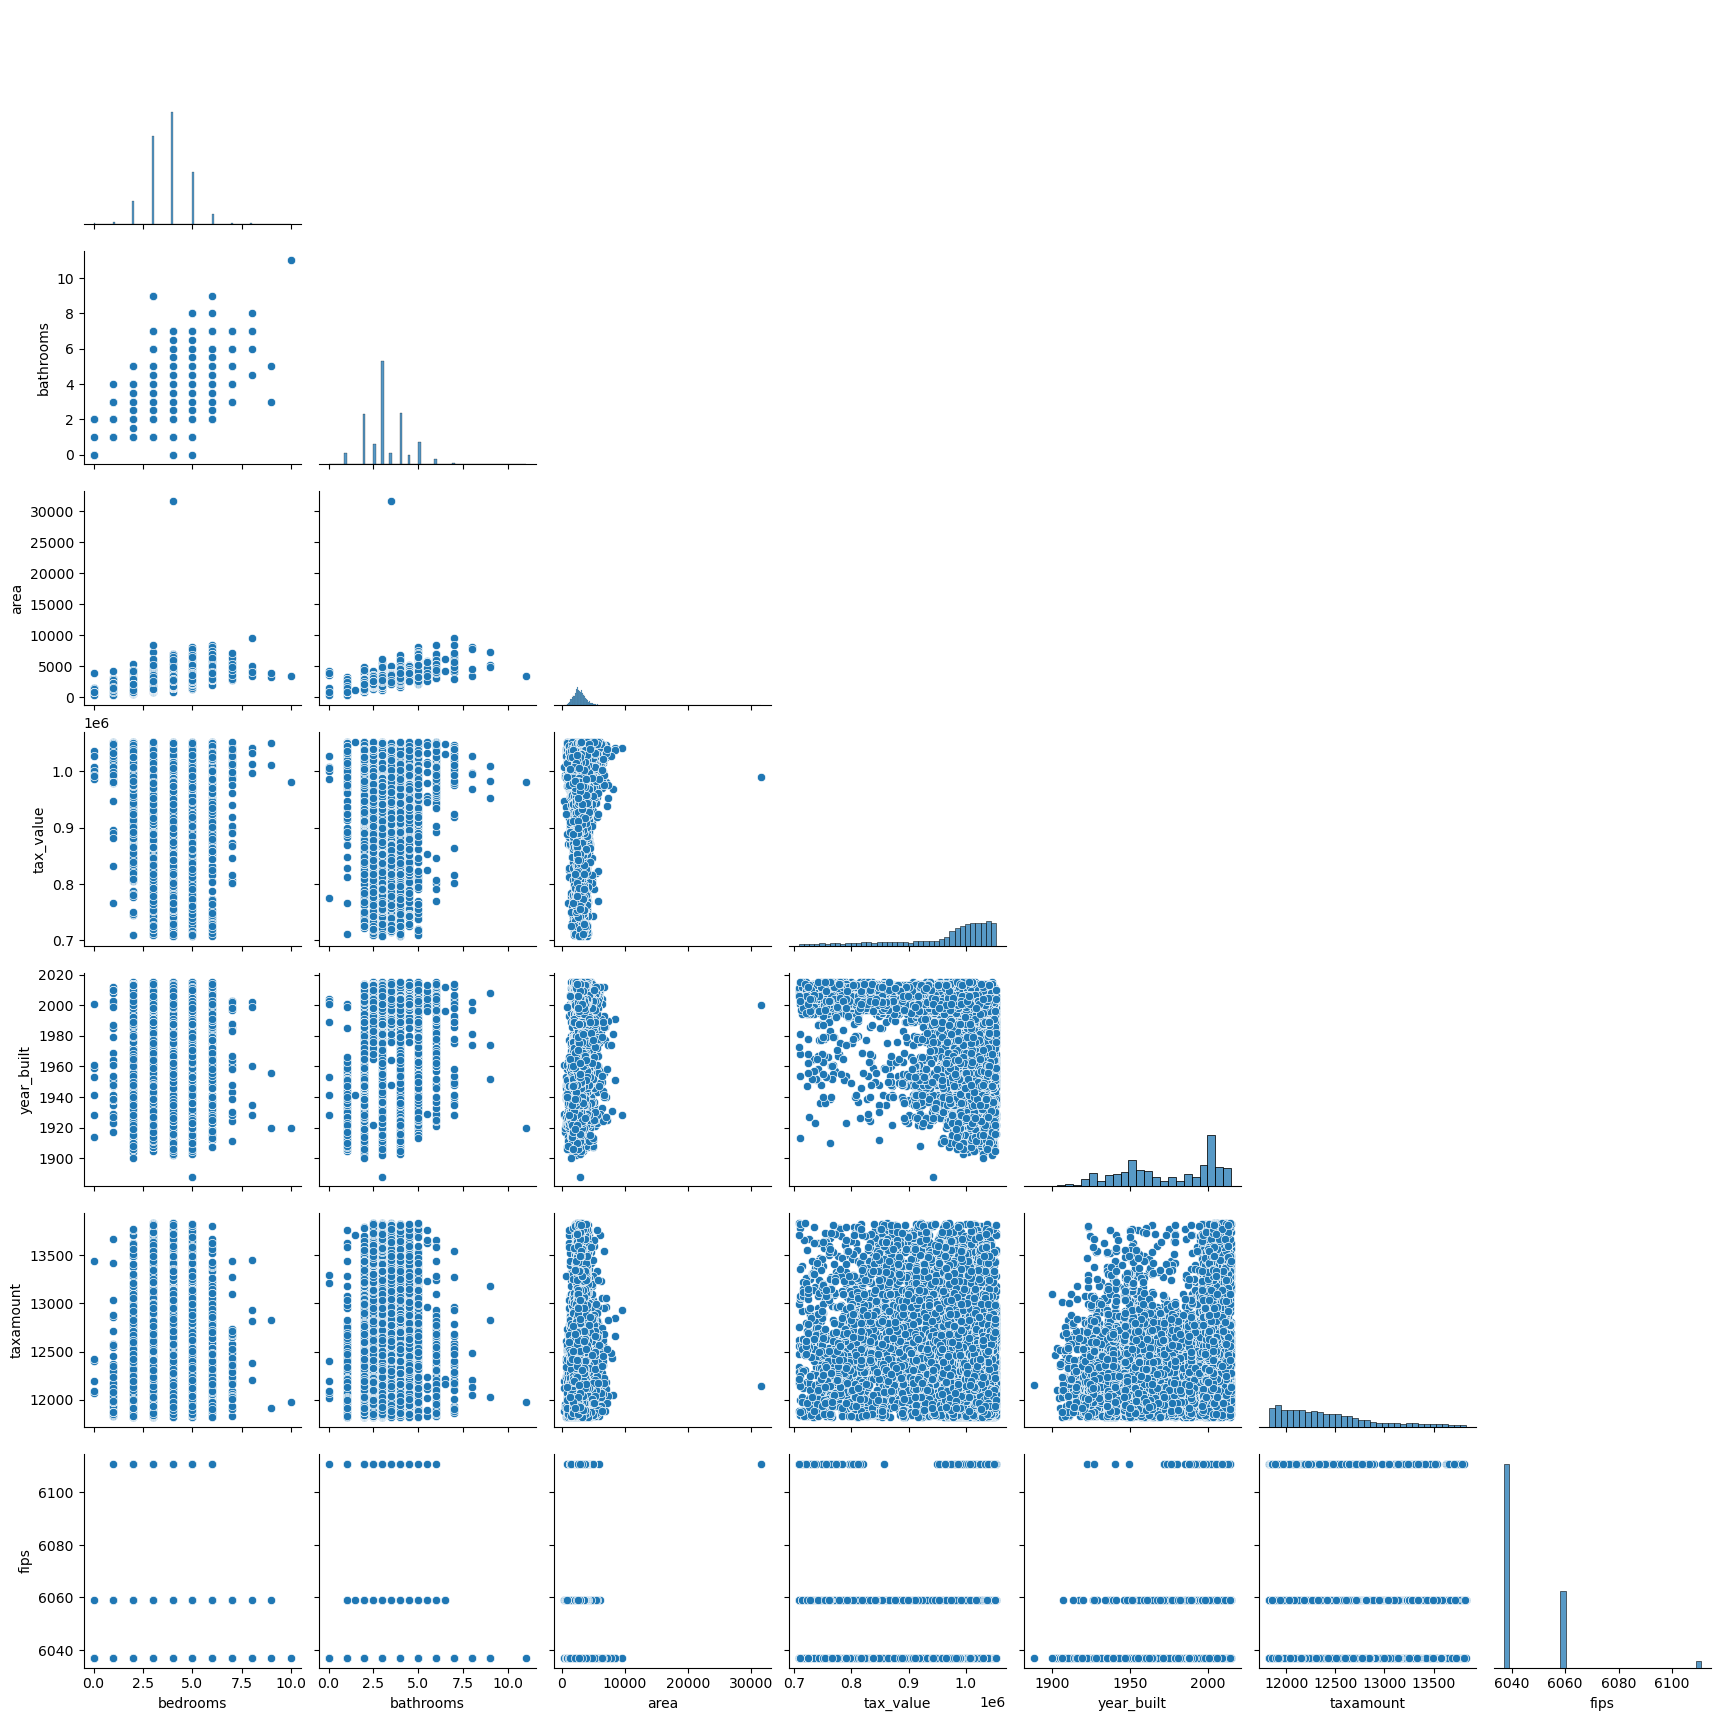

In [31]:
sns.pairplot(train[['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount', 'fips']], corner=True)
plt.show()

In [32]:
train.corr()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
bedrooms,1.000000,0.635687,0.603598,-0.106445,0.290076,0.086219,0.078546
bathrooms,0.635687,1.000000,0.744090,-0.021214,0.352201,0.070776,0.019532
area,0.603598,0.744090,1.000000,-0.032152,0.350558,0.086493,0.077535
tax_value,-0.106445,-0.021214,-0.032152,1.000000,-0.485819,-0.166440,-0.420286
year_built,0.290076,0.352201,0.350558,-0.485819,1.000000,0.312907,0.508385
taxamount,0.086219,0.070776,0.086493,-0.166440,0.312907,1.000000,0.268271
fips,0.078546,0.019532,0.077535,-0.420286,0.508385,0.268271,1.000000
